## Python Project - Apple Store App Trend Anlysis

## 1. Data Import & Cleaning

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import statsmodels.formula.api as smf
import textwrap
%matplotlib inline

In [213]:
df=pd.read_csv('AppleStore.csv')
df.isna().sum()
df

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [214]:
df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [215]:
df['cont_rating']=df['cont_rating'].str.replace('+','').astype(float)
df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating         float64
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

## 2. Data Visualization

### 2.1 Price Data Description

In [216]:
df['price'].describe()

count    7197.000000
mean        1.726218
std         5.833006
min         0.000000
25%         0.000000
50%         0.000000
75%         1.990000
max       299.990000
Name: price, dtype: float64

As you can see, most apps are free apps, so we devide apps into two main catagorie, that is free_apps and nonfree_apps, to see what we could find.

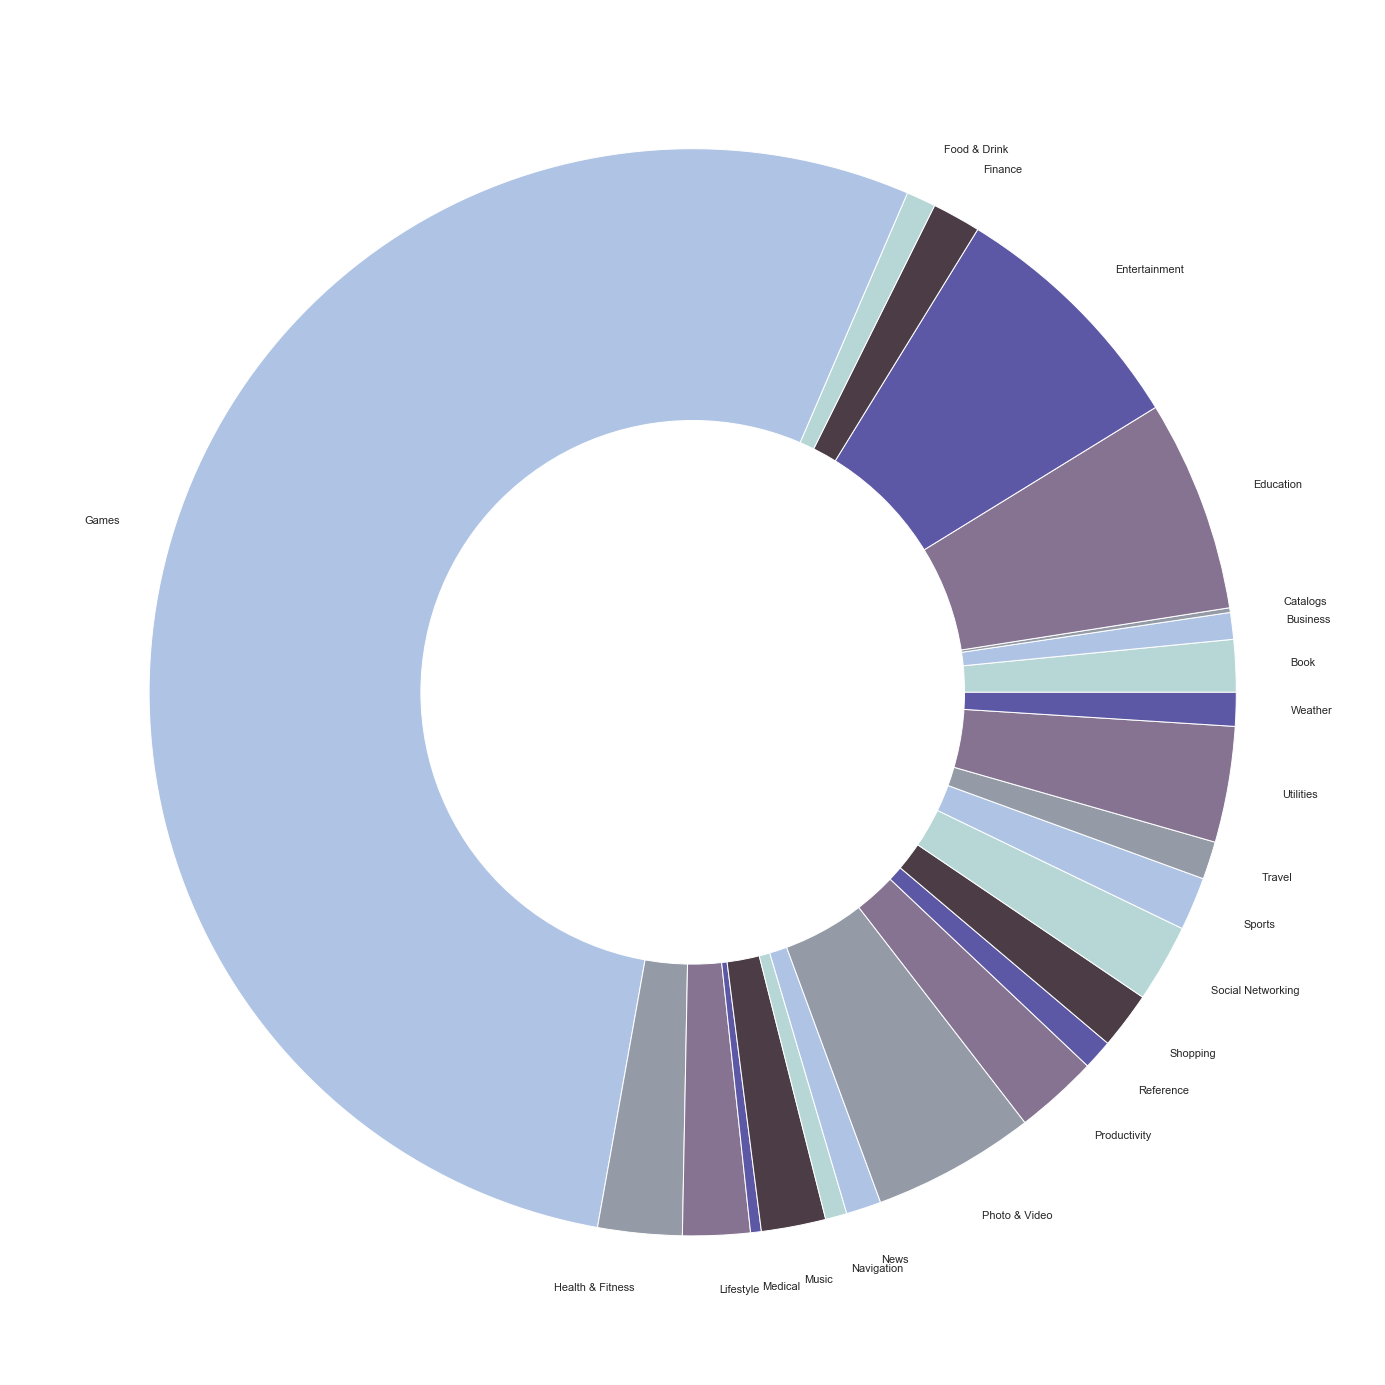

In [217]:
colorselected = ['#B7D7D7','#AFC4E5','#949BA6','#867391','#5D58A5','#4B3C45']
label1=df.prime_genre.value_counts().sort_index().index
size = df.prime_genre.value_counts().sort_index().tolist()
plt.figure(figsize=(25,25))
plt.pie(size, labels=label1, colors=colorselected)
inside_circle=plt.Circle( (0,0), 0.5, color='white')
plt.gcf().gca().add_artist(inside_circle)
plt.show()

In [193]:
free_apps= df[df.price==0]
nonfree_apps=df[df.price>0]

In [194]:
print('In this dataset '+ str(round(sum(df.price==0)/int(df.price.count())*100,2)) 
      +'%'+' of the total apps are free apps.')
print('In this dataset '+ str(round(sum(df.price>0)/int(df.price.count())*100,2)) 
      +'%'+' of the total apps are nonfree apps.')

In this dataset 56.36% of the total apps are free apps.
In this dataset 43.64% of the total apps are nonfree apps.


### 2.2 Pie Chart: Paid vs. Free by Categories

<Figure size 5040x5040 with 0 Axes>

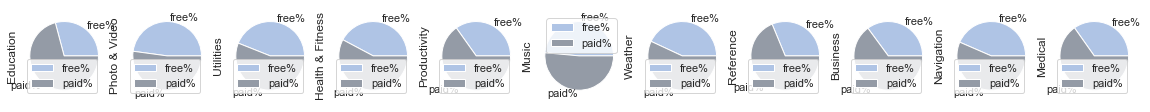

<Figure size 5040x5040 with 0 Axes>

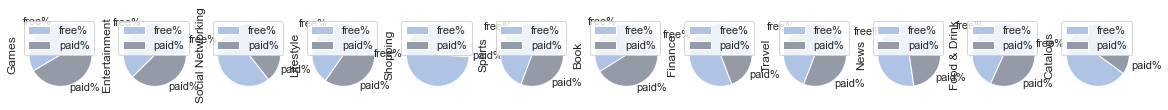

In [195]:
total=df.prime_genre.value_counts().to_frame()
free1=df[df.price==0].prime_genre.value_counts().to_frame()
nonfree1=df[df.price>0].prime_genre.value_counts().to_frame()

total.columns=['total']
free1.columns=['free']
nonfree1.columns=['paid']

table1=total.join(free1)
table2=table1.join(nonfree1)
table2['paid%'] = table2.paid*100/table2.total
table2['free%'] = table2.free*100/table2.total

t1=table2[table2['paid%']>=50]
t2=table2[table2['free%']>=50]



pies = t1[['free%','paid%']]
plt.figure(figsize=(70,70))
pies.T.plot.pie(subplots=True,figsize=(20,20),colors=['#AFC4E5','#949BA6'])
plt.show()

pies = t2[['free%','paid%']]
plt.figure(figsize=(70,70))
pies.T.plot.pie(subplots=True,figsize=(20,20),colors=['#AFC4E5','#949BA6'])


plt.show()

In [196]:
print('In this dataset '+ str(round(sum((df.price>=0)&(df.price<=50))/int(df.price.count())*100,2)) 
      +'%'+ ' of the total apps price are between $zero and $50.')

In this dataset 99.9% of the total apps price are between $zero and $50.


### 2.3 Common Price Choices

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Common Price Choices')

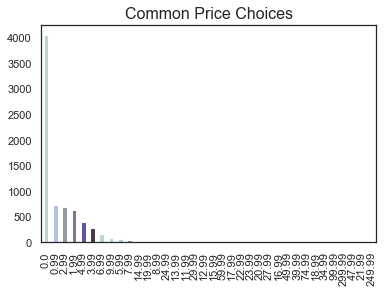

In [218]:
df1.price.value_counts().plot('bar',colors=['#B7D7D7','#AFC4E5','#949BA6','#867391','#5D58A5','#4B3C45'])
plt.title('Common Price Choices', fontsize=16)

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Common Price Choices - Paid App')

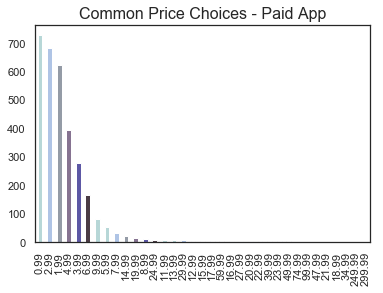

In [219]:
nonfree_apps.price.value_counts().plot('bar',colors=['#B7D7D7','#AFC4E5','#949BA6','#867391','#5D58A5','#4B3C45'])
plt.title('Common Price Choices - Paid App', fontsize=16)

Text(0.5, 0, 'Rate Distributions')

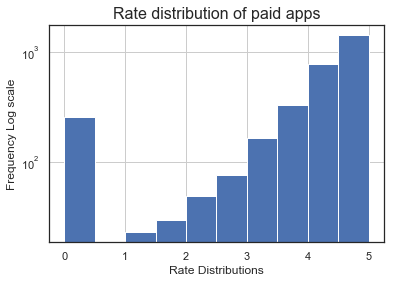

In [222]:
pd = nonfree_apps['user_rating'].hist(range=[0,5],log=True).set_title('Rate distribution of paid apps',fontsize=16)
plt.ylabel("Frequency Log scale")
plt.xlabel("Rate Distributions")

### 2.4 Price distribution over popular category 

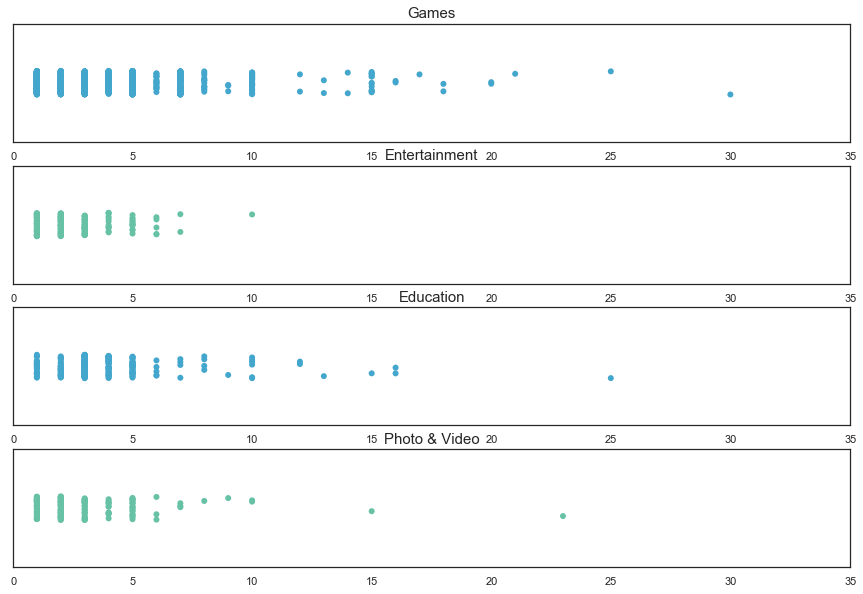

In [200]:
paidapps =df[(df.price>0)]
yrange = [0,35]
fsize =15


plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(yrange)
games = paidapps[paidapps.prime_genre=='Games']
sns.stripplot(data=games,y='price',jitter= True ,orient ='h', size=6,palette='GnBu_d')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,2)
plt.xlim(yrange)
ent = paidapps[paidapps.prime_genre=='Entertainment']
sns.stripplot(data=ent,y='price',jitter= True ,orient ='h',size=6,palette="BuGn_r")
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,3)
plt.xlim(yrange)
edu = paidapps[paidapps.prime_genre=='Education']
sns.stripplot(data=edu,y='price',jitter= True ,orient ='h' ,size=6,palette="GnBu_d")
plt.title('Education',fontsize=fsize)
plt.xlabel('') 
plt.subplot(4,1,4)
plt.xlim(yrange)
pv = paidapps[paidapps.prime_genre=='Photo & Video']
sns.stripplot(data=pv,y='price',jitter= True  ,orient ='h',size=6,palette="BuGn_r")
plt.title('Photo & Video',fontsize=fsize)
plt.xlabel('') 

plt.show()

Comment: As from the graph above, there seems to be a lot outlier prices, and to have a better sense of the general price performance over categories, here we plot the mean price over categories.

### 2.5 Mean Price by Category(Paid)

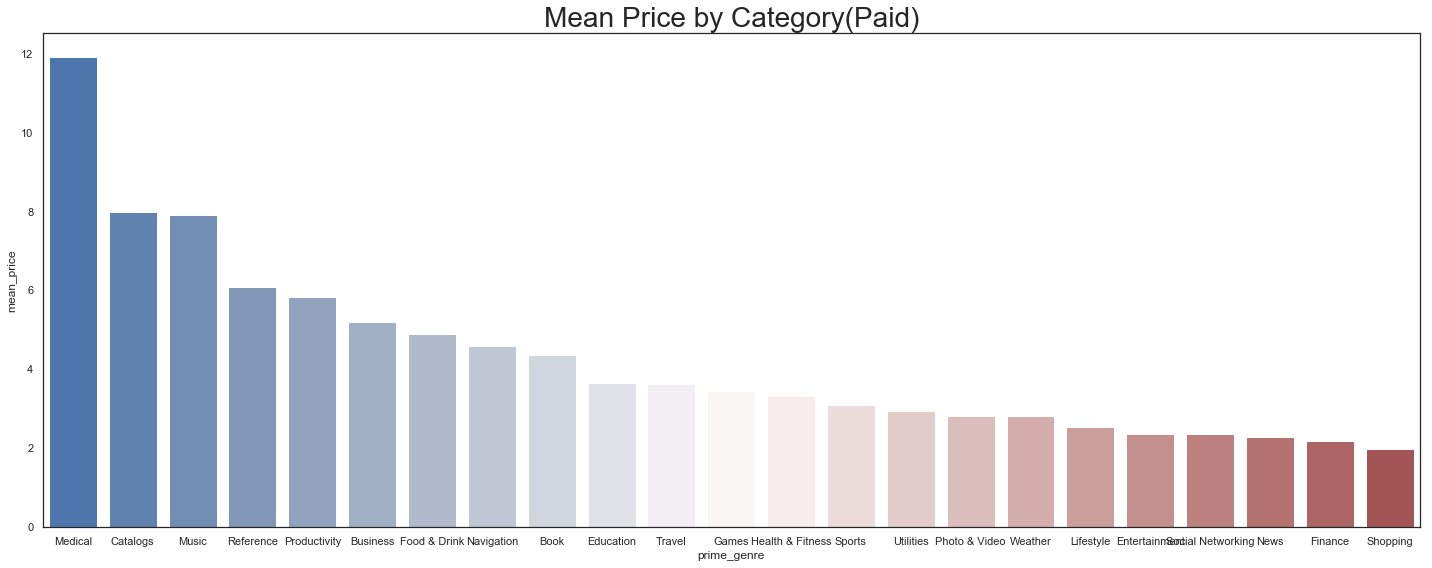

In [201]:
paid_adjusted =df[((df.price<30) & (df.price>0))]
mean_price = paid_adjusted.groupby('prime_genre')['price'].mean()
mean_price = mean_price.reset_index()
mean_price = mean_price.rename(columns={'price':'mean_price'})
mean_price = mean_price.sort_values(by=['mean_price'],ascending=False)
mean_price

#Plot: App Distribution by Category

plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.barplot(data = mean_price,  palette="vlag",x = 'prime_genre', y = 'mean_price')
plt.title('Mean Price by Category(Paid)',fontsize=28)
plt.tight_layout()
plt.show()

### 2.6 Rating distribution over category(Grouped by paid/free) 


Text(0.5, 0, 'Rate Distributions')

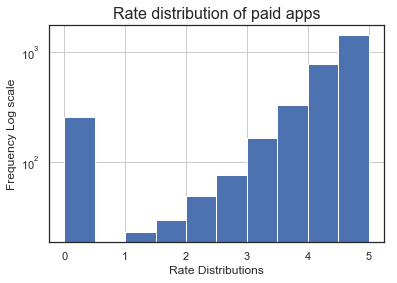

In [202]:
pd = nonfree_apps['user_rating'].hist(range=[0,5],log=True).set_title('Rate distribution of paid apps',fontsize=16)
plt.ylabel("Frequency Log scale")
plt.xlabel("Rate Distributions")

In [203]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

df['Free/Paid']= df.price.apply(lambda x : paid(x))
df.head()
df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic',
       'Free/Paid'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


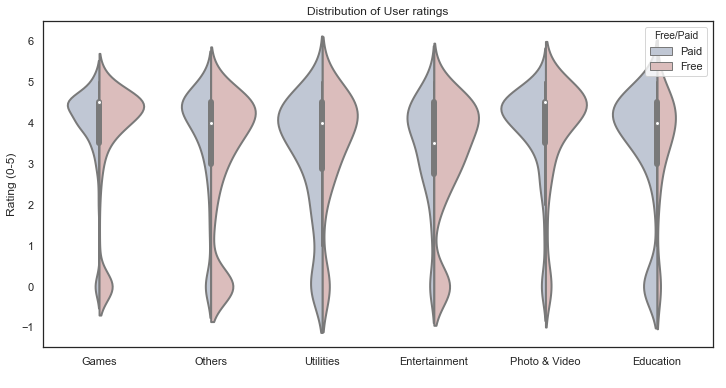

In [204]:
# Reduce number of genres
s = df.prime_genre.value_counts().index[:5]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"
df['genre']= df.prime_genre.apply(lambda x : categ(x))


plt.style.use('fast')
plt.figure(figsize=(12,6))
plt.title("Distribution of User ratings")
sns.violinplot(data=df, y ='user_rating',x='genre',hue='Free/Paid',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette="vlag",)
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()

###  2.7 Correlation Visualization

The correlation visualization shows that variables are not highly correlated. The highest correlation is around 0.3.


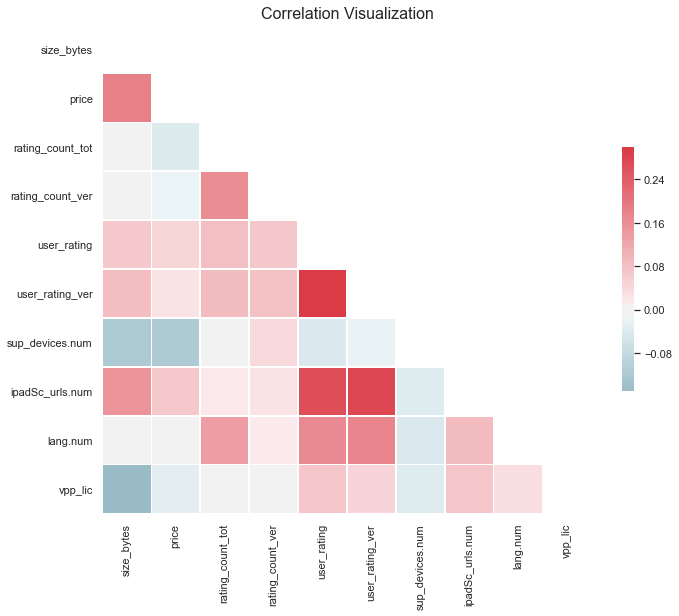

In [205]:

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset

d = pd.DataFrame(data=df,
                 columns=(df.columns[2:]))
#df['user_rating'],df['price'],df['rating_count_tot'],df['category'])
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Visualization', fontsize=16)

#comment
print('''The correlation visualization shows that variables are not highly correlated. The highest correlation is around 0.3.''')

### 2.7 Mean Ratings by Category

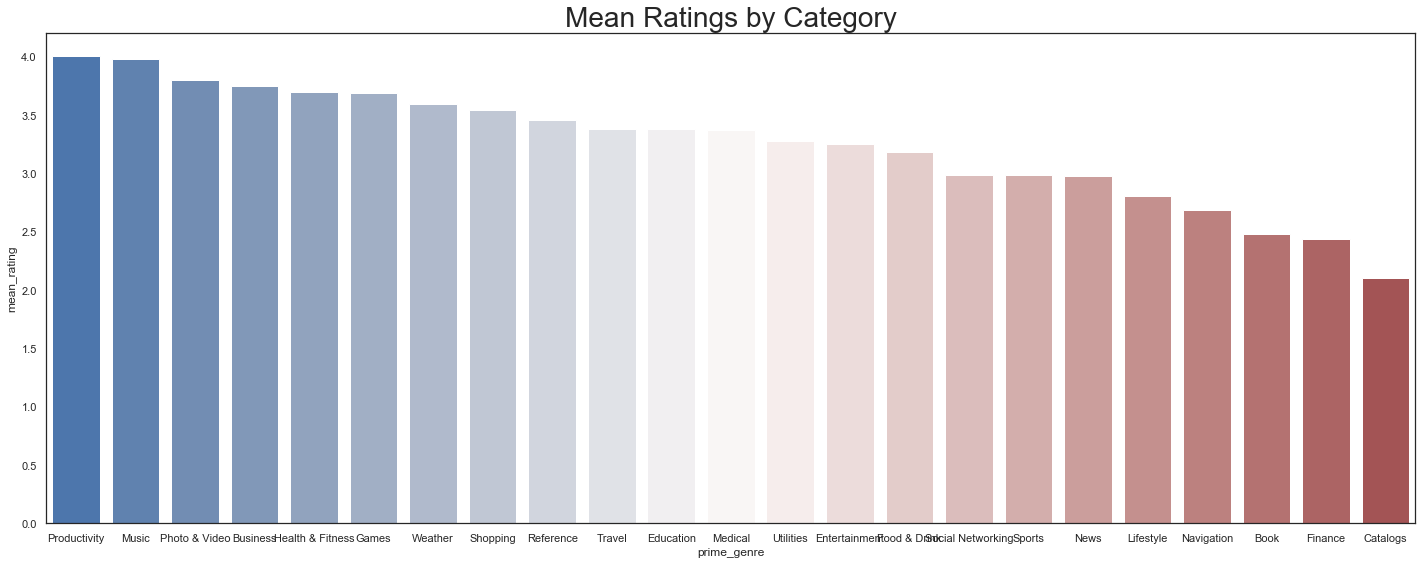

The category with highest mean user rating is Productivity. The lowest average rating is around 2.5 for Catalogs.


In [206]:
#Generate dataframe genre_count
mean_rating = df.groupby('prime_genre')['user_rating'].mean()
mean_rating = mean_rating.reset_index()
mean_rating = mean_rating.rename(columns={'user_rating':'mean_rating'})
mean_rating = mean_rating.sort_values(by=['mean_rating'],ascending=False)
mean_rating
#Plot: App Distribution by Category

plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.barplot(data = mean_rating,  palette="vlag",x = 'prime_genre', y = 'mean_rating')
plt.title('Mean Ratings by Category',fontsize=28)
plt.tight_layout()
plt.show()

print('''The category with highest mean user rating is Productivity. The lowest average rating is around 2.5 for Catalogs.''')

### 2.8 Paid App price distribution

In [207]:
#Data cleaning
#Read data
df=pd.read_csv('AppleStore.csv')

#drop meaningless column:'Unnamed: 0'
df = df.drop(columns="Unnamed: 0")

#Rename columns
df = df.rename(columns={'track_name':'app_name',
                     'rating_count_tot':'rating_count_all',
                     'rating_count_ver':'rating_count_current',
                     'user_rating':'avg_rating_all',
                     'user_rating_ver':'avg_rating_current',
                     'ver':'version',
                     'cont_rating':'content_rating',
                     'prime_genre':'genre',
                     'sup_devices.num':'suppurting_devices',
                     'ipadSc_urls.num':'screenshots',
                     'lang.num':'languages'})


The histogram is highly skewed, because of outliers.
We want to look into the price distribution of majority paid Apps.
Therefore, in histogram2 we removed the paid Apps with price above $30 from the dataset.



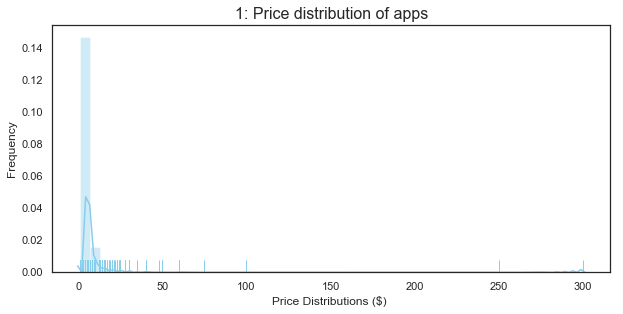

In [208]:
#Create varaibles for free and paid Apps
free = df[df.price==0]
paid = df[df.price!=0]

#Plot histogram of paid Apps
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot( paid.price, rug=True, color="skyblue", label="paid")

#Set plot name
plt.title('1: Price distribution of apps',fontsize=16)
plt.ylabel("Frequency")
plt.xlabel("Price Distributions ($) ")

print ('\n'
       'The histogram is highly skewed, because of outliers.\n'
       'We want to look into the price distribution of majority paid Apps.\n'
       'Therefore, in histogram2 we removed the paid Apps with price above $30 from the dataset.\n')

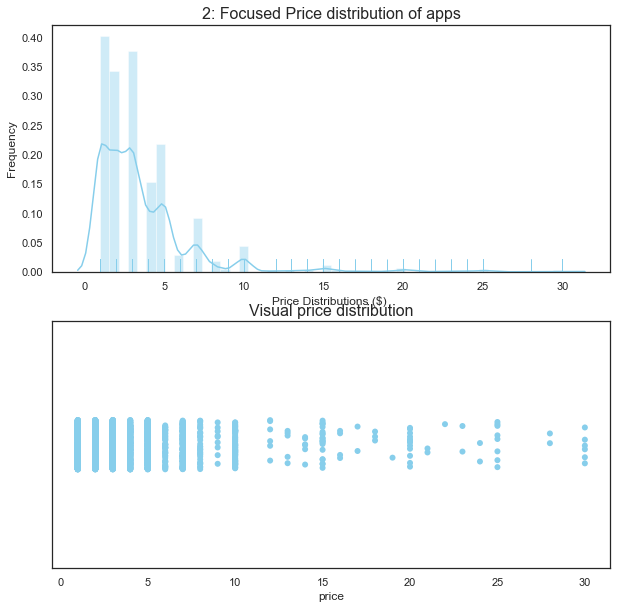

From histogram2, we have a focused view about the price distribution of paid Apps.
The visual distribution presented a more straght-forward view.
Most paid Apps are priced under $10. Less Apps are priced between $10 and $30.
The number of Apps reduces significantly when the price is above $30.


In [209]:
#Draw the histogram for the Apps in the lower tail
paid_adjusted =df[((df.price<30) & (df.price>0))]
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot( paid_adjusted.price, rug=True, color="skyblue", label="paid")

#Set histogram name
plt.title('2: Focused Price distribution of apps',fontsize=16)
plt.ylabel("Frequency")
plt.xlabel("Price Distributions ($) ")

#Visual presentation
plt.subplot(2,1,2)
plt.title('Visual price distribution',fontsize=16)
sns.stripplot(data=paid_adjusted,y='price',jitter= True,orient = 'h' ,size=6, color='skyblue')
plt.show()

print('From histogram2, we have a focused view about the price distribution of paid Apps.\n'
      'The visual distribution presented a more straght-forward view.\n'
      'Most paid Apps are priced under $10. Less Apps are priced between $10 and $30.\n' 
      'The number of Apps reduces significantly when the price is above $30.')

In [210]:
#A display of outliers
outliers = df[df.price>30][['app_name','price','genre']]
print(' \n'
      'Outliers:'
      'In a total number of 7917 Apps, there are only ' + str(outliers['price'].count()) + ' apps priced over $30.')

outliers.sort_values('price')

 
Outliers:In a total number of 7917 Apps, there are only 13 apps priced over $30.


,app_name,price,genre
3012,Anatomy & Physiology: Body Structures and Func...,34.99,Medical
2405,KORG Gadget,39.99,Music
3093,KORG Module,39.99,Music
778,プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）,47.99,Reference
1688,Cubasis 2 - Mobile Music Creation System,49.99,Music
5340,VPN Pro | Lifetime Proxy & Best VPN by Betternet,49.99,Business
1136,Articulation Station Pro,59.99,Education
2181,Articulation Test Center Pro,59.99,Education
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business
162,NAVIGON Europe,74.99,Navigation


### 2.9 App Distribution by Category

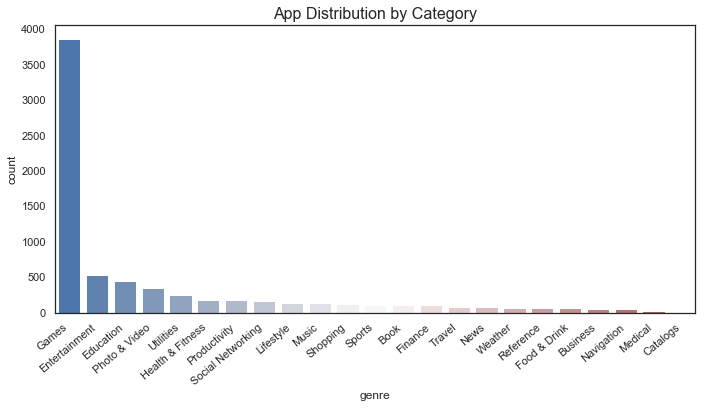

There are 23 categories in IOS App Store. Games has the most number of Apps. Entertainment and
education are the second and third place. For the ease of interpretation, we keep Games, Education,
Entertainment, Photos & Video, Utilities as major categories, and combine the remaining genres into
'Others'.


In [211]:
#Generate dataframe genre_count
genre_count = df.groupby('genre')['id'].nunique()
genre_count = genre_count.reset_index()
genre_count = genre_count.rename(columns={'id':'counts'})
genre_count = genre_count.sort_values(by='counts',ascending=False)

#Plot: App Distribution by Category
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.barplot(data = genre_count,  palette="vlag",x = 'genre', y = 'counts')

#Set plot attributes
plt.title('App Distribution by Category',fontsize=16)
ax = sns.countplot(x="genre", data=genre_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#Comment
strs = '''There are 23 categories in IOS App Store. Games has the most number of Apps. Entertainment and education are the second and third place.
For the ease of interpretation, we keep Games, Education, Entertainment, Photos & Video, Utilities as major categories, and combine the remaining genres into 'Others'.'''
print(textwrap.fill(strs, 100))



### 2.10 Compare Paid and Free Apps by Category

In [142]:
#Create "others" category
df1 = df
s = df.genre.value_counts().index[:5]
def categ(i):
    if i in s:
        return i
    else : 
        return "Others"

df1['broad_genre']= df1.genre.apply(lambda i : categ(i))

In [143]:
free = df1[df1.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = df1[df1.price>0].broad_genre.value_counts().sort_index().to_frame()
total = df1.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_pct'] = dist.paid*100/dist.total
dist ['free_pct'] = dist.free*100/dist.total
dist

,free,paid,total,paid_pct,free_pct
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1057,693,1750,39.600000,60.400000
Photo & Video,167,182,349,52.148997,47.851003
Utilities,109,139,248,56.048387,43.951613


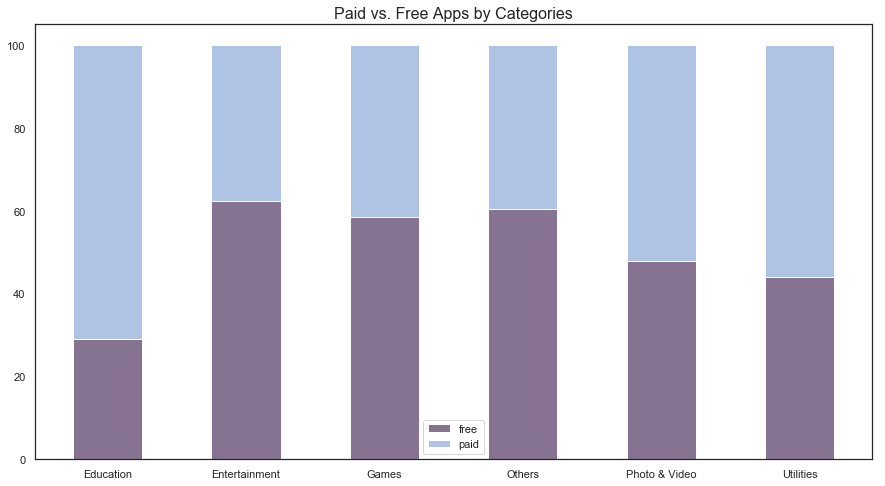

The bar plot shows that categories are not heavily skewed except for Education. In education, more
than 2/3 of the Apps are paid.


In [144]:
#Create list for the percentage of paid and free Apps
list_free= dist.free_pct.tolist()
list_paid= dist.paid_pct.tolist()

#Plot
plt.figure(figsize=(15,8))
N=6
ind = np.arange(N) 
barWidth = 0.5
p1 = plt.bar(ind, list_free, width=barWidth, color='#867391')
p2 = plt.bar(ind, list_paid, width=barWidth,bottom=list_free,color='#AFC4E5')

#Set Plot Attribute
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.title('Paid vs. Free Apps by Categories',fontsize=16)
plt.show()

#Comment
strs1 = 'The bar plot shows that categories are not heavily skewed except for Education. In education, more than 2/3 of the Apps are paid.'
print(textwrap.fill(strs1, 100))

In [145]:
df3 = df
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,12,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,12,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

[132, 321, 334, 201, 2257, 1605, 1057, 693, 167, 182, 109, 139]

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

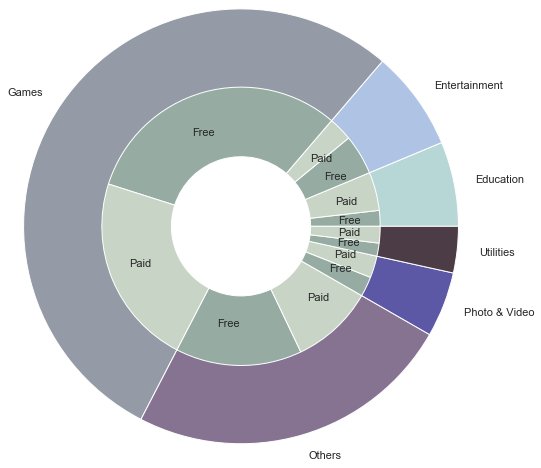

In [146]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,12,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,12,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=df1.broad_genre.value_counts().sort_index().index
group_size=df1.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 6*h
sub= ['#96ACA3','#C8D4C5']
subcolors= 6*sub
subgroup_size=final.num.tolist()

#Set color
ring1 = ['#B7D7D7','#AFC4E5','#949BA6','#867391','#5D58A5','#4B3C45']

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=ring1)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)


### 2.11 Distribution of App Size

Most Apps are small sizes. This is expected because mobile devices limit the development of large
Apps.


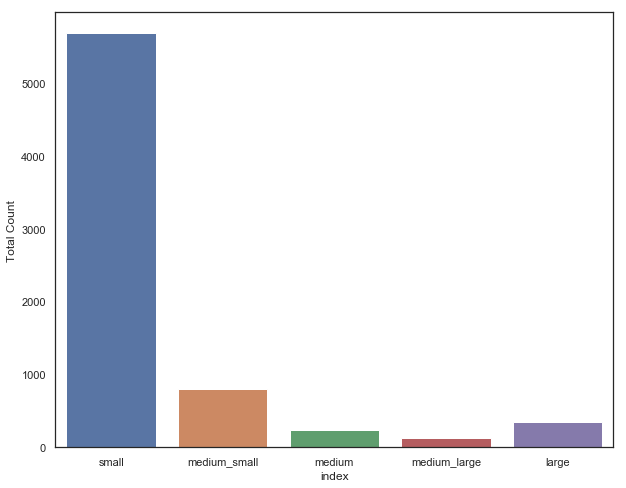

In [147]:
#Define size category
df2=df
small = df2[(df2['size_bytes'] < 209715200)].count().to_frame()
medium_small = df2[(209715200<=df2['size_bytes'])&(df2['size_bytes'] < 419430400)].count().to_frame()
medium = df2[(419430400<=df2['size_bytes'])&(df2['size_bytes'] < 629145600)].count().to_frame()
medium_large = df2[(629145600<=df2['size_bytes'])&(df2['size_bytes'] < 838860800)].count().to_frame()
large = df2[838860800<=df2['size_bytes']].count().to_frame()                  

small.columns=['small']
medium_small.columns=['medium_small']
medium.columns=['medium']
medium_large.columns=['medium_large']
large.columns=['large']

dist1 = small.join(medium_small).join(medium).join(medium_large).join(large).transpose()
dist1 = dist1.reset_index()
dist1 = dist1.rename(columns={'id':'counts'})

#Plot
plt.figure(figsize=(10,8))
ax = sns.barplot(x='index', y='counts', data=dist1)
ax.set_ylabel('Total Count')

#Comment
strs2 = 'Most Apps are small sizes. This is expected because mobile devices limit the development of large Apps.'
print(textwrap.fill(strs2, 100))

### 2.12 Number of Screenshots displayed VS. User Rating

The plot shows the relative frequency between number of screenshots in the App store and average
user rating for the Apps.Apps post screenshots in the description bar to provide users a visual
preview of the App. This is usually where users get the first impression. We want to explore whether
more pictures would prompt users to give the App a better rating. Most Apps are clustered in the
upper left corner. These Apps are those who have relatively high rating scores and post more than 4
pictures in the App store. There is chance that an App could get high rating without posting any
screenshots, but the cluster is very small. Therefore, it is conform with our first intuition that
Apps with more pictures have high rating. However, it could also be the case that Apps with high
ratings tend to do better on all aspects including post more screeshots.


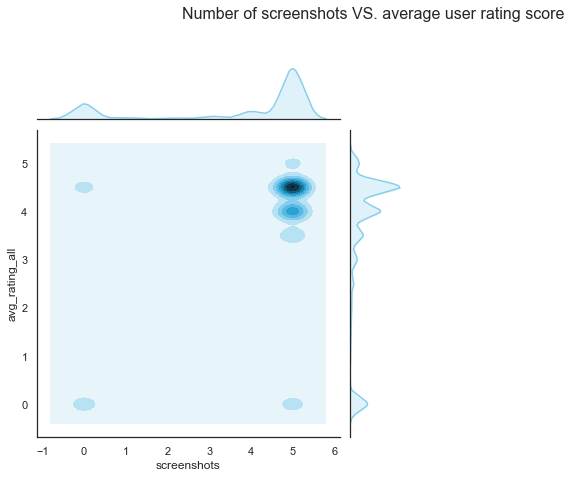

In [148]:
#Joint relationship between number of screenshots displayed in the App store and averate user rating score
sns.jointplot(x="screenshots", y="avg_rating_all", data=df, kind="kde",color='skyblue')

#Set plot
plt.text(0.5, 8, 'Number of screenshots VS. average user rating score',
         horizontalalignment='center',
         fontsize=16)

strs2 = 'The plot shows the relative frequency between number of screenshots in the App store and average user rating for the Apps.Apps post screenshots in the description bar to provide users a visual preview of the App. This is usually where users get the first impression. We want to explore whether more pictures would prompt users to give the App a better rating. Most Apps are clustered in the upper left corner. These Apps are those who have relatively high rating scores and post more than 4 pictures in the App store. There is chance that an App could get high rating without posting any screenshots, but the cluster is very small. Therefore, it is conform with our first intuition that Apps with more pictures have high rating. However, it could also be the case that Apps with high ratings tend to do better on all aspects including post more screeshots.'
         
print(textwrap.fill(strs2, 100))


## 3. Regression on User Ratings

###  3.1 Correlation Visualization

The correlation visualization shows that variables are not highly correlated. The highest correlation is around 0.3.


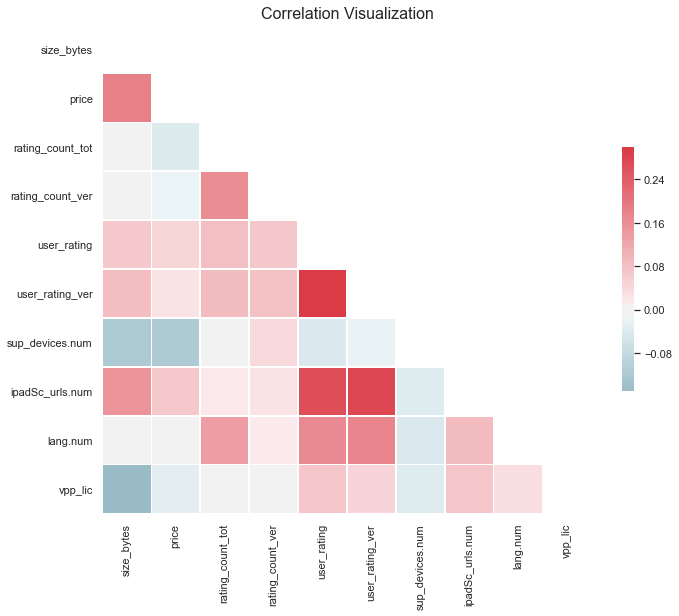

In [186]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset

d = pd.DataFrame(data=df,
                 columns=(df.columns[2:]))
#df['user_rating'],df['price'],df['rating_count_tot'],df['category'])
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Visualization', fontsize=16)

#comment
print('''The correlation visualization shows that variables are not highly correlated. The highest correlation is around 0.3.''')

### 3.2 Regression Results

In [118]:
import statsmodels.formula.api as smf
%matplotlib inline

In [119]:
content = pd.to_numeric(df['cont_rating'])
sup = pd.to_numeric(df['sup_devices.num'])
ipad = pd.to_numeric(df['ipadSc_urls.num'])
lang = pd.to_numeric(df['lang.num'])

In [120]:
reg = smf.ols('user_rating ~ price + size_bytes + rating_count_tot + rating_count_ver + content + sup + ipad +lang',data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     105.6
Date:                Thu, 16 May 2019   Prob (F-statistic):          3.49e-167
Time:                        14:24:11   Log-Likelihood:                -12816.
No. Observations:                7197   AIC:                         2.565e+04
Df Residuals:                    7188   BIC:                         2.571e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1595      0.180  

In [122]:
print('R-squared is 0.0105, which is very small indicating that these independent variables are poor to explain Average User Rating value. However, all the independent variables are statistically significant at significant level equals to 0.05. Based on those p-values, Size of app, size of app, Average User Rating value, User Rating counts, Content Rating, Number of supporting devices, Number of screenshots showed for display, and Number of supported languages are decisively significant to affect Average User Rating value. App price and Number of supporting devices are moderately significant to affect Average User Rating value')

R-squared is 0.0105, which is very small indicating that these independent variables are poor to explain Average User Rating value. However, all the independent variables are statistically significant at significant level equals to 0.05. Based on those p-values, Size of app, size of app, Average User Rating value, User Rating counts, Content Rating, Number of supporting devices, Number of screenshots showed for display, and Number of supported languages are decisively significant to affect Average User Rating value. App price and Number of supporting devices are moderately significant to affect Average User Rating value
